# Comparing hydrographic sections from CMEMS with ship CTDs

In [6]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.mpl.ticker as cticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
sns.set_style('dark')
from info import datadir, figdir

import warnings
warnings.filterwarnings('ignore')

In [7]:
# CMEMS climatologies
data = sio.loadmat(datadir+'hydrographic_sections.mat')
lon_section = data['lon'][0]
lat_section = data['lat'][0]
dist = data['distance'][0]
depth = data['depth'][0]
Dist,Depth=np.meshgrid(dist,depth)
S_clim = data['S_clim']
T_clim = data['T_clim']
sigma_clim = data['sigma_clim']

# CMEMS 2005
data = sio.loadmat(datadir+'hydrographic_section_2005_sep.mat')
SA05_CMEMS = data['SA']
CT05_CMEMS = data['CT']
sigma05_CMEMS = data['sigma0']

# CTD 2005
ctd05 = sio.loadmat(datadir+'CTD2005.mat')
lon05 = ctd05['lon'][0]
lat05 = ctd05['lat'][0]
dist05 = ctd05['dist'][0]
depth05 = ctd05['depth'][0]
Dist05,Depth05 = np.meshgrid(dist05,depth05)
SA05 = ctd05['SA']
CT05 = ctd05['CT']
sigma05 = ctd05['sigma0']

# CMEMS 2016
data = sio.loadmat(datadir+'hydrographic_section_2016_aug.mat')
SA16_CMEMS = data['SA']
CT16_CMEMS = data['CT']
sigma16_CMEMS = data['sigma0']

# CTD 2016
ctd16 = sio.loadmat(datadir+'CTD2016.mat')
lon16 = ctd16['lon'][0]
lat16 = ctd16['lat'][0]
dist16 = ctd16['dist'][0]
depth16 = ctd16['depth'][0]
Dist16,Depth16 = np.meshgrid(dist16,depth16)
SA16 = ctd16['SA']
CT16 = ctd16['CT']
sigma16 = ctd16['sigma0']

In [3]:
def plotSection(Dist,Depth,data,ax,cmap,levels,ticks,label,ext='both',inv_cbar=False):
    sectionplot = ax.contourf(Dist,Depth,data,cmap=cmap,levels=levels,extend=ext)
    cbar = plt.colorbar(sectionplot,ax=ax,ticks=ticks)
    cbar.ax.tick_params(axis='y', which='both', labelsize=14)
    cbar.ax.set_ylabel(label, fontsize=16, labelpad=25)
    if inv_cbar:
        cbar.ax.invert_yaxis()
    ax.set_xticks(np.arange(0,800e3,100e3))
    ax.set_xticklabels(np.arange(0,800,100))
    ax.set_xlabel('Distance (km)',fontsize=15)
    ax.set_ylim(0,3200)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_ylabel('Depth (m)',fontsize=15)
    ax.tick_params(axis='both',labelsize=14)
    ax.vlines([120e3,310e3],0,3200,colors='k')

## September 2005

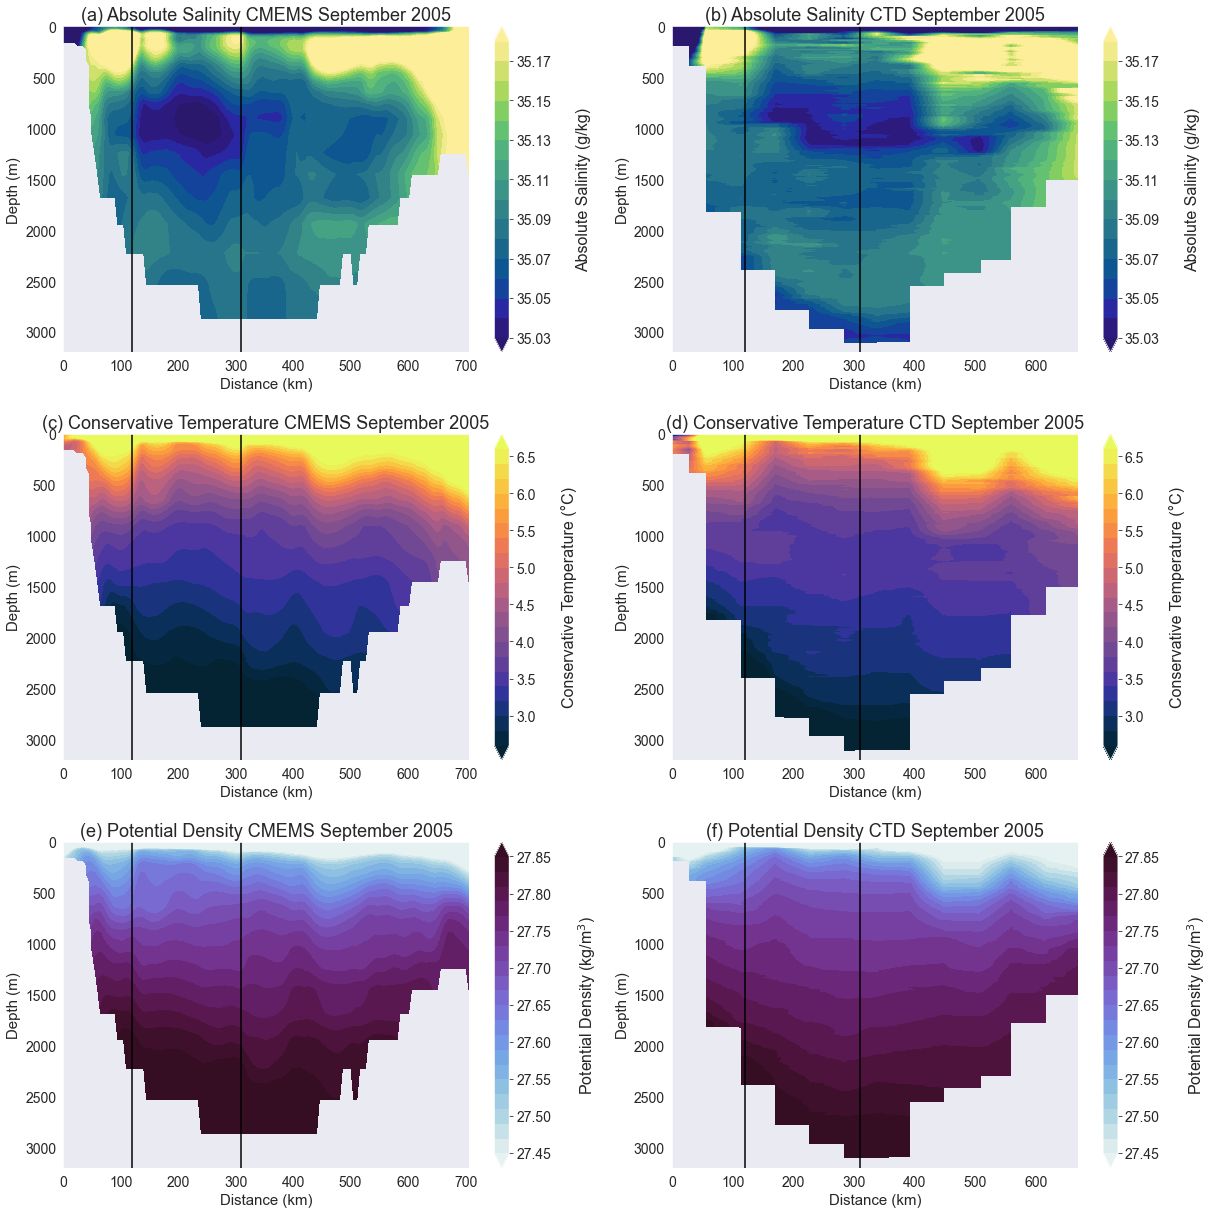

In [4]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(20,21))

# SALINITY
plotSection(Dist,Depth,SA05_CMEMS,ax1,'cmo.haline',levels=np.arange(35.03,35.19,0.01),ticks=np.arange(35.03,35.19,0.02),
            label='Absolute Salinity (g/kg)',inv_cbar=False)
ax1.set_title('(a) Absolute Salinity CMEMS September 2005',fontsize=18)

plotSection(Dist05,Depth05,SA05,ax2,'cmo.haline',levels=np.arange(35.03,35.19,0.01),ticks=np.arange(35.03,35.19,0.02),
            label='Absolute Salinity (g/kg)',inv_cbar=False)
ax2.set_title('(b) Absolute Salinity CTD September 2005',fontsize=18)

# TEMPERATURE
plotSection(Dist,Depth,CT05_CMEMS,ax3,'cmo.thermal',levels=np.arange(2.6,6.61,0.2),ticks=np.arange(3,8.1,0.5),
            label='Conservative Temperature ('+'\u00B0'+'C)')
ax3.set_title('(c) Conservative Temperature CMEMS September 2005',fontsize=18)

plotSection(Dist05,Depth05,CT05,ax4,'cmo.thermal',levels=np.arange(2.6,6.61,0.2),ticks=np.arange(3,8.1,0.5),
            label='Conservative Temperature ('+'\u00B0'+'C)')
ax4.set_title('(d) Conservative Temperature CTD September 2005',fontsize=18)

# DENSITY
plotSection(Dist,Depth,sigma05_CMEMS,ax5,'cmo.dense',levels=np.arange(27.45,27.86,0.02),ticks=np.arange(27.45,27.86,0.05),
            label='Potential Density (kg/m$^3$)',inv_cbar=False)
ax5.set_title('(e) Potential Density CMEMS September 2005',fontsize=18)

plotSection(Dist05,Depth05,sigma05,ax6,'cmo.dense',levels=np.arange(27.45,27.86,0.02),ticks=np.arange(27.45,27.86,0.05),
            label='Potential Density (kg/m$^3$)',inv_cbar=False)
ax6.set_title('(f) Potential Density CTD September 2005',fontsize=18)

plt.subplots_adjust(hspace=0.25)
plt.savefig(figdir+'CTD_validation_2005.png',dpi=500,bbox_inches='tight')
plt.savefig(figdir+'CTD_validation_2005.pdf',bbox_inches='tight')
plt.show()

## August 2016

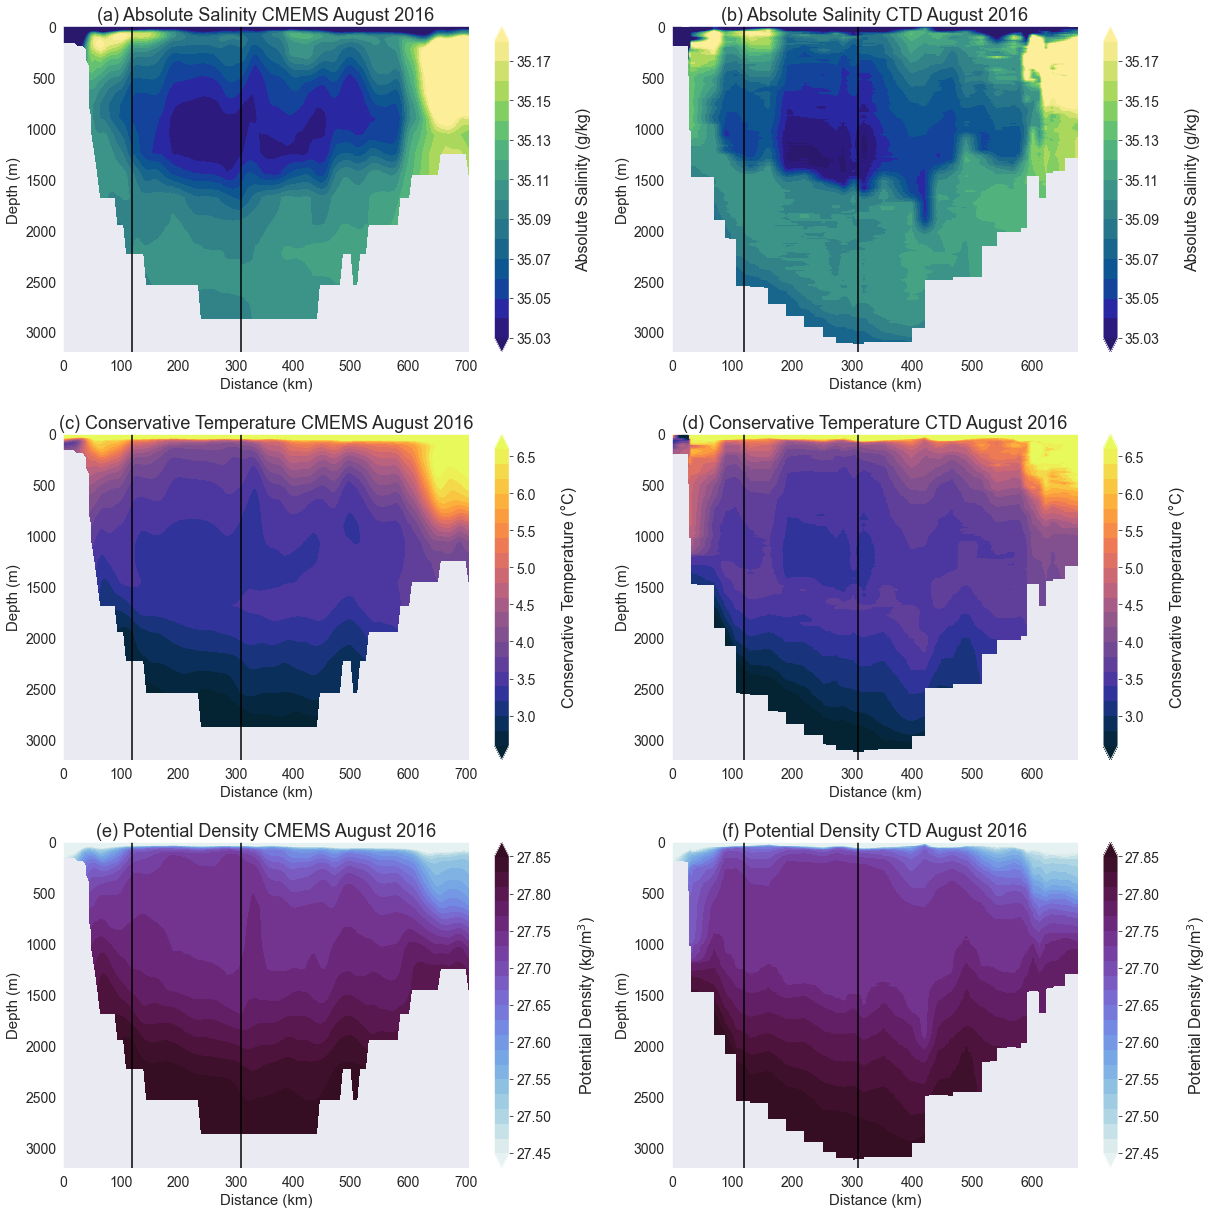

In [5]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(20,21))

# SALINITY
plotSection(Dist,Depth,SA16_CMEMS,ax1,'cmo.haline',levels=np.arange(35.03,35.19,0.01),ticks=np.arange(35.03,35.19,0.02),
            label='Absolute Salinity (g/kg)',inv_cbar=False)
ax1.set_title('(a) Absolute Salinity CMEMS August 2016',fontsize=18)

plotSection(Dist16,Depth16,SA16,ax2,'cmo.haline',levels=np.arange(35.03,35.19,0.01),ticks=np.arange(35.03,35.19,0.02),
            label='Absolute Salinity (g/kg)',inv_cbar=False)
ax2.set_title('(b) Absolute Salinity CTD August 2016',fontsize=18)

# TEMPERATURE
plotSection(Dist,Depth,CT16_CMEMS,ax3,'cmo.thermal',levels=np.arange(2.6,6.61,0.2),ticks=np.arange(3,8.1,0.5),
            label='Conservative Temperature ('+'\u00B0'+'C)')
ax3.set_title('(c) Conservative Temperature CMEMS August 2016',fontsize=18)

plotSection(Dist16,Depth16,CT16,ax4,'cmo.thermal',levels=np.arange(2.6,6.61,0.2),ticks=np.arange(3,8.1,0.5),
            label='Conservative Temperature ('+'\u00B0'+'C)')
ax4.set_title('(d) Conservative Temperature CTD August 2016',fontsize=18)

# DENSITY
plotSection(Dist,Depth,sigma16_CMEMS,ax5,'cmo.dense',levels=np.arange(27.45,27.86,0.02),ticks=np.arange(27.45,27.86,0.05),
            label='Potential Density (kg/m$^3$)',inv_cbar=False)
ax5.set_title('(e) Potential Density CMEMS August 2016',fontsize=18)

plotSection(Dist16,Depth16,sigma16,ax6,'cmo.dense',levels=np.arange(27.45,27.86,0.02),ticks=np.arange(27.45,27.86,0.05),
            label='Potential Density (kg/m$^3$)',inv_cbar=False)
ax6.set_title('(f) Potential Density CTD August 2016',fontsize=18)

plt.subplots_adjust(hspace=0.25)
plt.savefig(figdir+'CTD_validation_2016.png',dpi=500,bbox_inches='tight')
plt.savefig(figdir+'CTD_validation_2016.pdf',bbox_inches='tight')
plt.show()